In [4]:
import sagemaker
import boto3
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import os
import io
from sklearn.linear_model import LinearRegression
from sagemaker import Session

In [7]:
# Initialize SageMaker Session
sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()

bucket = sagemaker_session.default_bucket()
prefix = 'lab3'
print(f"Using S3 bucket: {bucket}")

Using S3 bucket: sagemaker-us-east-1-711387140068


In [8]:
print("hi")

hi


In [9]:
# Generate synthetic data with a clear linear relationship plus some noise
X = np.linspace(0, 50, 200)
noise = np.random.normal(0, 5, 200)  # Adding some random noise
y = 2.5 * X + 15 + noise

# Create a Pandas DataFrame
df = pd.DataFrame({'feature_x': X, 'target_y': y})

# Save the DataFrame to a Local CSV file
df.to_csv('training_data.csv', index=False)

print("Dataset created. First 5 rows:")
print(df.head())


Dataset created. First 5 rows:
   feature_x   target_y
0   0.000000  14.114397
1   0.251256  23.700611
2   0.502513  15.532118
3   0.753769  17.728233
4   1.005025  13.584833


In [10]:
# Upload the local CSV file to the specified S3 path
s3_data_path = sagemaker_session.upload_data(
    path='training_data.csv',
    bucket=bucket,
    key_prefix=prefix
)

print(f"Data successfully uploaded to: {s3_data_path}")


Data successfully uploaded to: s3://sagemaker-us-east-1-711387140068/lab3/training_data.csv


In [11]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

# Train the model using our feature and target variables
# We need to reshape X to be a 2D array for scikit-learn
X_train = df[['feature_x']]
y_train = df['target_y']

model.fit(X_train, y_train)

# Get predictions from the model for our training data
y_pred = model.predict(X_train)

print("Model training complete.")
print(f"Model Intercept (c): {model.intercept_:.2f}")
print(f"Model Coefficient (m): {model.coef_[0]:.2f}")


Model training complete.
Model Intercept (c): 15.78
Model Coefficient (m): 2.46


In [12]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_train, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")



Mean Squared Error (MSE): 22.38


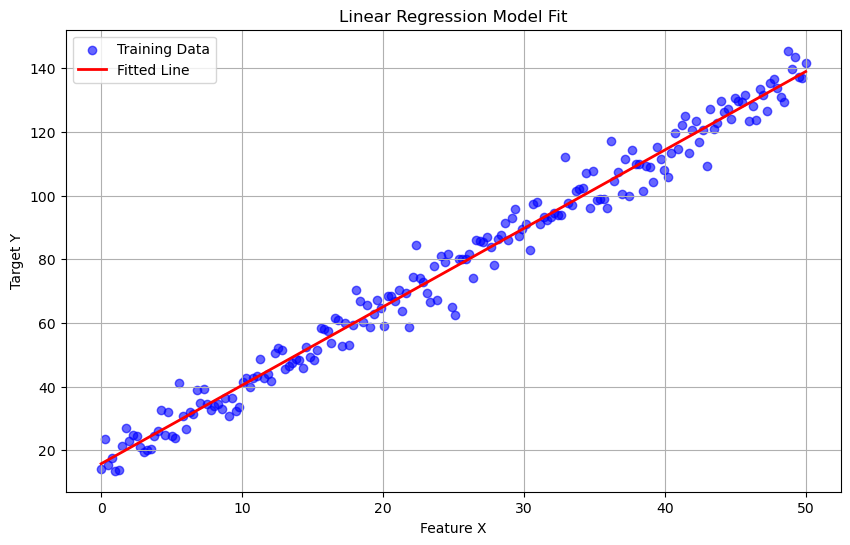

In [13]:
import matplotlib.pyplot as plt

# Plot the linear regression model fit
plt.figure(figsize=(10, 6))

# Scatter plot of actual data
plt.scatter(X_train, y_train, color='blue', alpha=0.6, label='Training Data')

# Plot the regression line
plt.plot(X_train, y_pred, color='red', linewidth=2, label='Fitted Line')

plt.xlabel("Feature X")
plt.ylabel("Target Y")
plt.title("Linear Regression Model Fit")
plt.legend()
plt.grid(True)
plt.show()
